#  **Clustering**

## Description

Iris Data Set:
A dataset containing information about different types of flowers. Each flower is described using four features - sepal length, sepal width, petal length, and petal width. The dataset contains 150 samples, with 50 samples for each of the three species of flowers - Iris setosa, Iris virginica, and Iris versicolor.





## Tasks did using the dataset
1.  Load the dataset using Python libraries such as Pandas and Numpy.
2.   Visualize the dataset using scatter plots to see if there are any natural clusters in the data.
3. Preprocess the data by scaling it to ensure that all the features are on the same scale.  
4.Use the KMeans algorithm to cluster the data into three clusters, one for each type of flower.
5.  Visualize the clusters using scatter plots and color-coding to see how well the algorithm was able to separate the different types of flowers. 
6. Evaluate the quality of the clustering using metrics such as the silhouette score. 
7.  Experiment with different values of K (the number of clusters) to see how it affects the quality of the clustering. 
8.   Implement hierarchical clustering and compare the results with KMeans.




In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [63]:
#Task1-code
df = pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


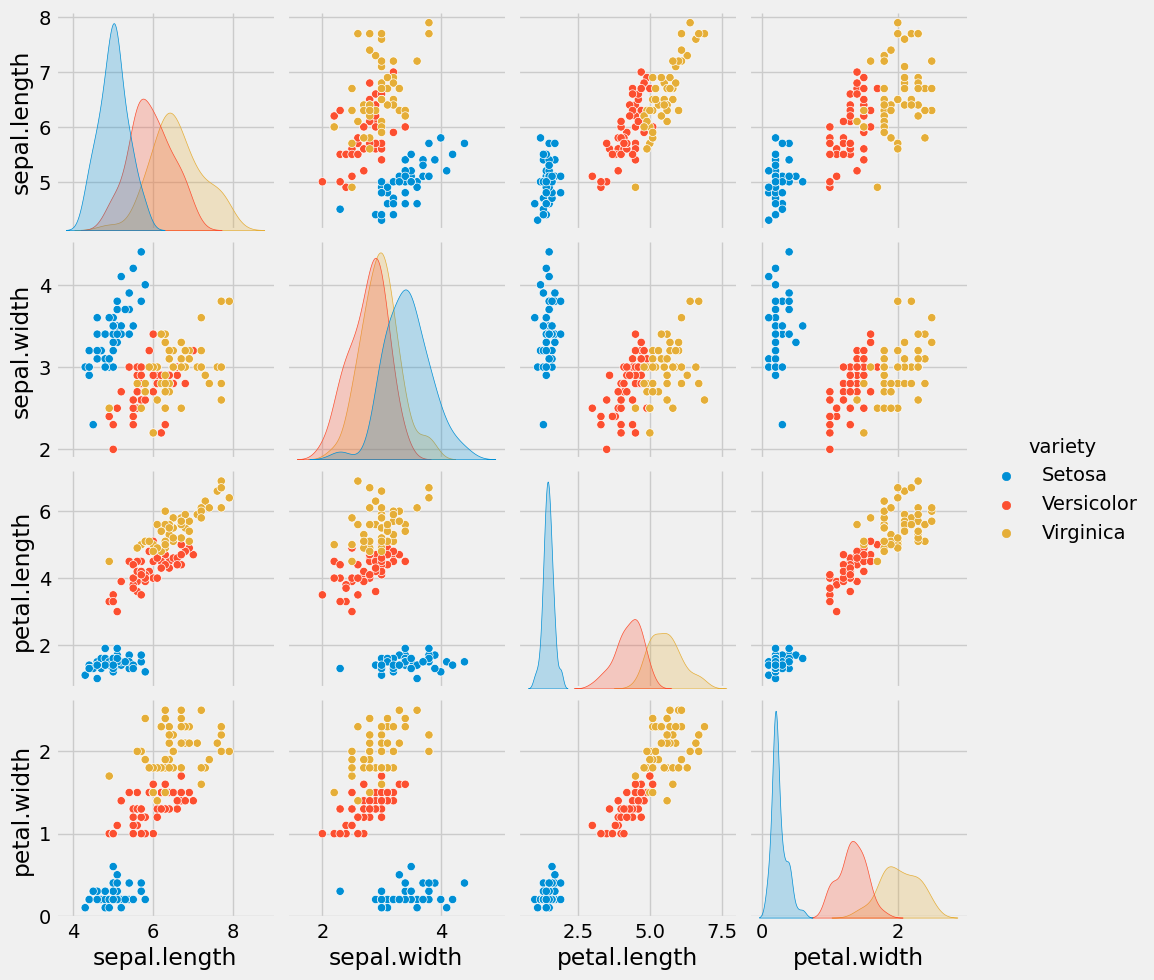

In [64]:
#Task2-code
sns.pairplot(data=df, hue="variety")
plt.show()


From the above pairplot, we can observe the clusters of iris varieties.

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
#Task3-code

X = df.drop("variety", axis=1)
y = df["variety"]

# Scaling  the features using StandardScaler to ensure them on same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converting the scaled data into dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [67]:
X_scaled_df

,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [68]:
#Task4-code

# Clustering the data into 3 clusters using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

df["cluster"] = kmeans.labels_

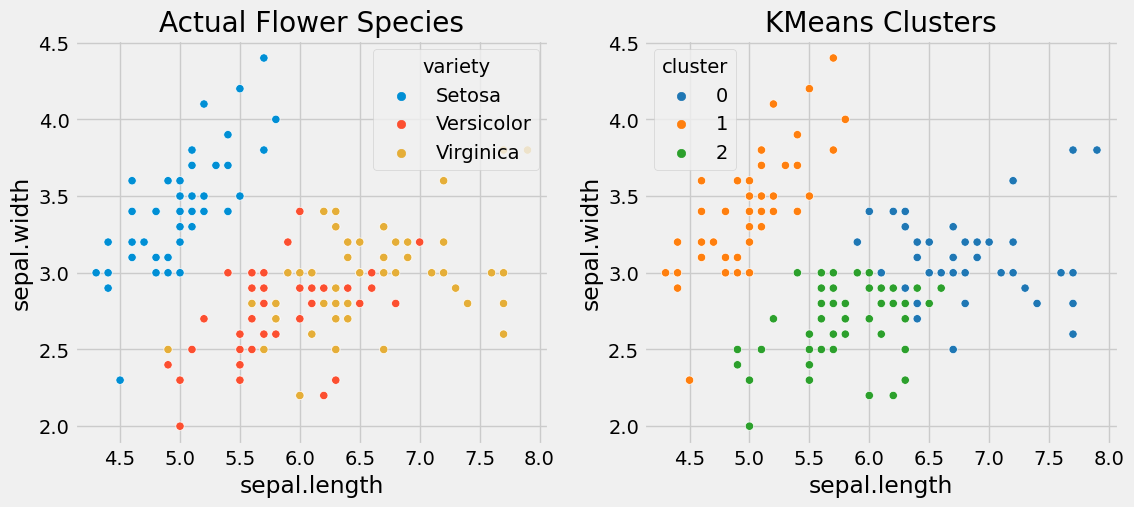

In [74]:
#Task5-code
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Plot the actual flower species in the first subplot
sns.scatterplot(x="sepal.length", y="sepal.width", hue="variety", data=df, ax=axs[0])
axs[0].set_title("Actual Flower Species")

# Plot the KMeans clusters in the second subplot
cluster_colors = {0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c"}
sns.scatterplot(x="sepal.length", y="sepal.width", hue="cluster", palette=cluster_colors, data=df, ax=axs[1])
axs[1].set_title("KMeans Clusters")

# Show the plots
plt.show()

In [70]:
#Task6-code
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.45994823920518646


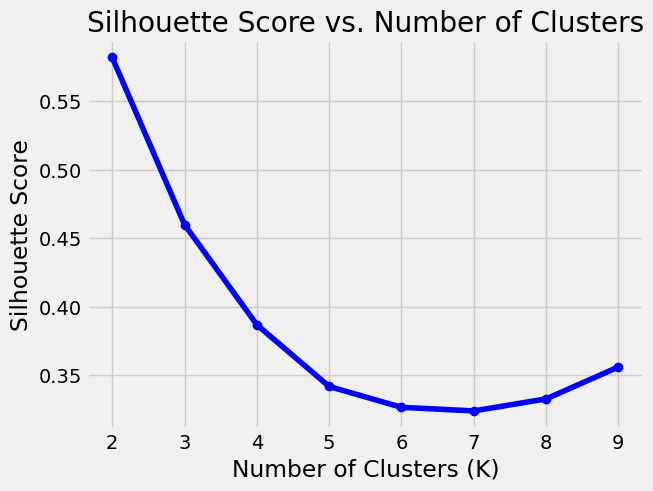

In [71]:
#Task7-code

Ks = range(2, 10)

# Compute the silhouette score for each value of K
silhouette_scores = []
for K in Ks:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the silhouette scores for each value of K
plt.plot(Ks, silhouette_scores, "bo-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

In [72]:
#Task8-code

from sklearn.cluster import AgglomerativeClustering

# Performing KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# hierarchical clustering with n_clusters=3
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(X_scaled)


kmeans_score = silhouette_score(X_scaled, kmeans.labels_)
hierarchical_score = silhouette_score(X_scaled, hierarchical.labels_)

print("KMeans silhouette score: {:.3f}".format(kmeans_score))
print("Hierarchical silhouette score: {:.3f}".format(hierarchical_score))

KMeans silhouette score: 0.460
Hierarchical silhouette score: 0.447


In [73]:
pd.options.display.max_rows = 50